# t-SNE with python

### Use t-SNE algorithm to visualize the categories (B or M) in the given cancer dataset

We will visualize the t-SNE data projection using **bioinfokit** and **Seaborn**

In [2]:
# for visualization we need to install 'bioinfokit' library
!pip install bioinfokit

     -------------------------------------- 87.0/87.0 kB 307.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58669 sha256=4a64471799053867346e02cfc56a07582ea804dd35edd79bcf9dc898829cedf1
  Stored in directory: c:\users\manoj\appdata\local\pip\cache\wheels\c9\ab\ed\8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7074 sha256=b7abc198940649ac00ebaed0a8060db873db8a8e8eaca8fc13dfe0519f00b524
  Stored in directory: c:\users\manoj\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
  Created wheel for matplotlib-venn: file

In [3]:
import pandas as pd

from sklearn.manifold import TSNE

from bioinfokit.visuz import cluster

In [4]:
# load data
filename = 'TSNE_data.csv'
dataframe = pd.read_csv(filename)

In [5]:
dataframe.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
dataframe.groupby(['diagnosis']).mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [8]:
# store the dataframe as an array
array = dataframe.values

# separate array into input and output components
X = array[:, 1:]
Y = array[:, 0]

In [74]:
# Fitting TSNE algorithm to data

# creating an instanceof 'TSNE'
tsne_model = TSNE(n_components=2, random_state=42) # n_components = 2, because output colum has two categories

# fitting the model to data and transforming data
tsne_data = tsne_model.fit_transform(X) # there is no separate transform() function in TSNE

C:\Users\manoj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [75]:
tsne_data

array([[ 11.889147 , -43.742085 ],
       [  9.3512535, -42.758698 ],
       [ 11.409003 , -38.598537 ],
       ...,
       [ 11.449878 , -20.83888  ],
       [ 10.345136 , -40.846283 ],
       [ 13.58777  ,  43.7553   ]], dtype=float32)

In [81]:
tsne_data.shape

# now the  dataset has been reduced to two components or two dimensions in the output of TSNE algorithm

(569, 2)

In [83]:
# Let's see the parameters of our TSNE model
tsne_model.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'warn',
 'learning_rate': 'warn',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 42,
 'square_distances': 'legacy',
 'verbose': 0}

In [87]:
# Let's see the attributes of our TSNE model

# embedding vectors
tsne_model.embedding_

array([[ 11.889147 , -43.742085 ],
       [  9.3512535, -42.758698 ],
       [ 11.409003 , -38.598537 ],
       ...,
       [ 11.449878 , -20.83888  ],
       [ 10.345136 , -40.846283 ],
       [ 13.58777  ,  43.7553   ]], dtype=float32)

In [88]:
tsne_model.embedding_.shape

(569, 2)

In [90]:
# KL divergence after optimization
tsne_model.kl_divergence_

0.25533047318458557

In [91]:
# Number of features see during fit (should be same as no. of features in the input data)
tsne_model.n_features_in_

30

In [95]:
# Number of ierations run
tsne_model.n_iter_

999

## t-SNE visualization using 'bioinfokit.visuz.cluster.tsenplot()'

In [80]:
help(cluster.tsneplot)

Help on function tsneplot in module bioinfokit.visuz:

tsneplot(score=None, axlabelfontsize=9, axlabelfontname='Arial', figtype='png', r=300, show=False, markerdot='o', dotsize=6, valphadot=1, colordot='#4a4e4d', colorlist=None, legendpos='best', figname='tsne_2d', dim=(6, 4), legendanchor=None, theme=None)



In [77]:
# creating TSNE Plot
cluster.tsneplot(score=tsne_data)

# plot will be stored in the defualt directory

In [78]:
# give the plot a name

cluster.tsneplot(score=tsne_data,
                 figname='TSNE_2D_without_colour')


In [79]:
# let's pass target column 'diagnosis' as a colour parameter and add legends

# creating a list of target values
colours = dataframe['diagnosis'].tolist() # converting series to a list is not mandatory

cluster.tsneplot(score=tsne_data,
                 colorlist=colours,
                 figname='TSNE_2D_with_colour',
                 legendpos='upper right',
                 legendanchor=(1.15, 1))


#### The plot should look like this :

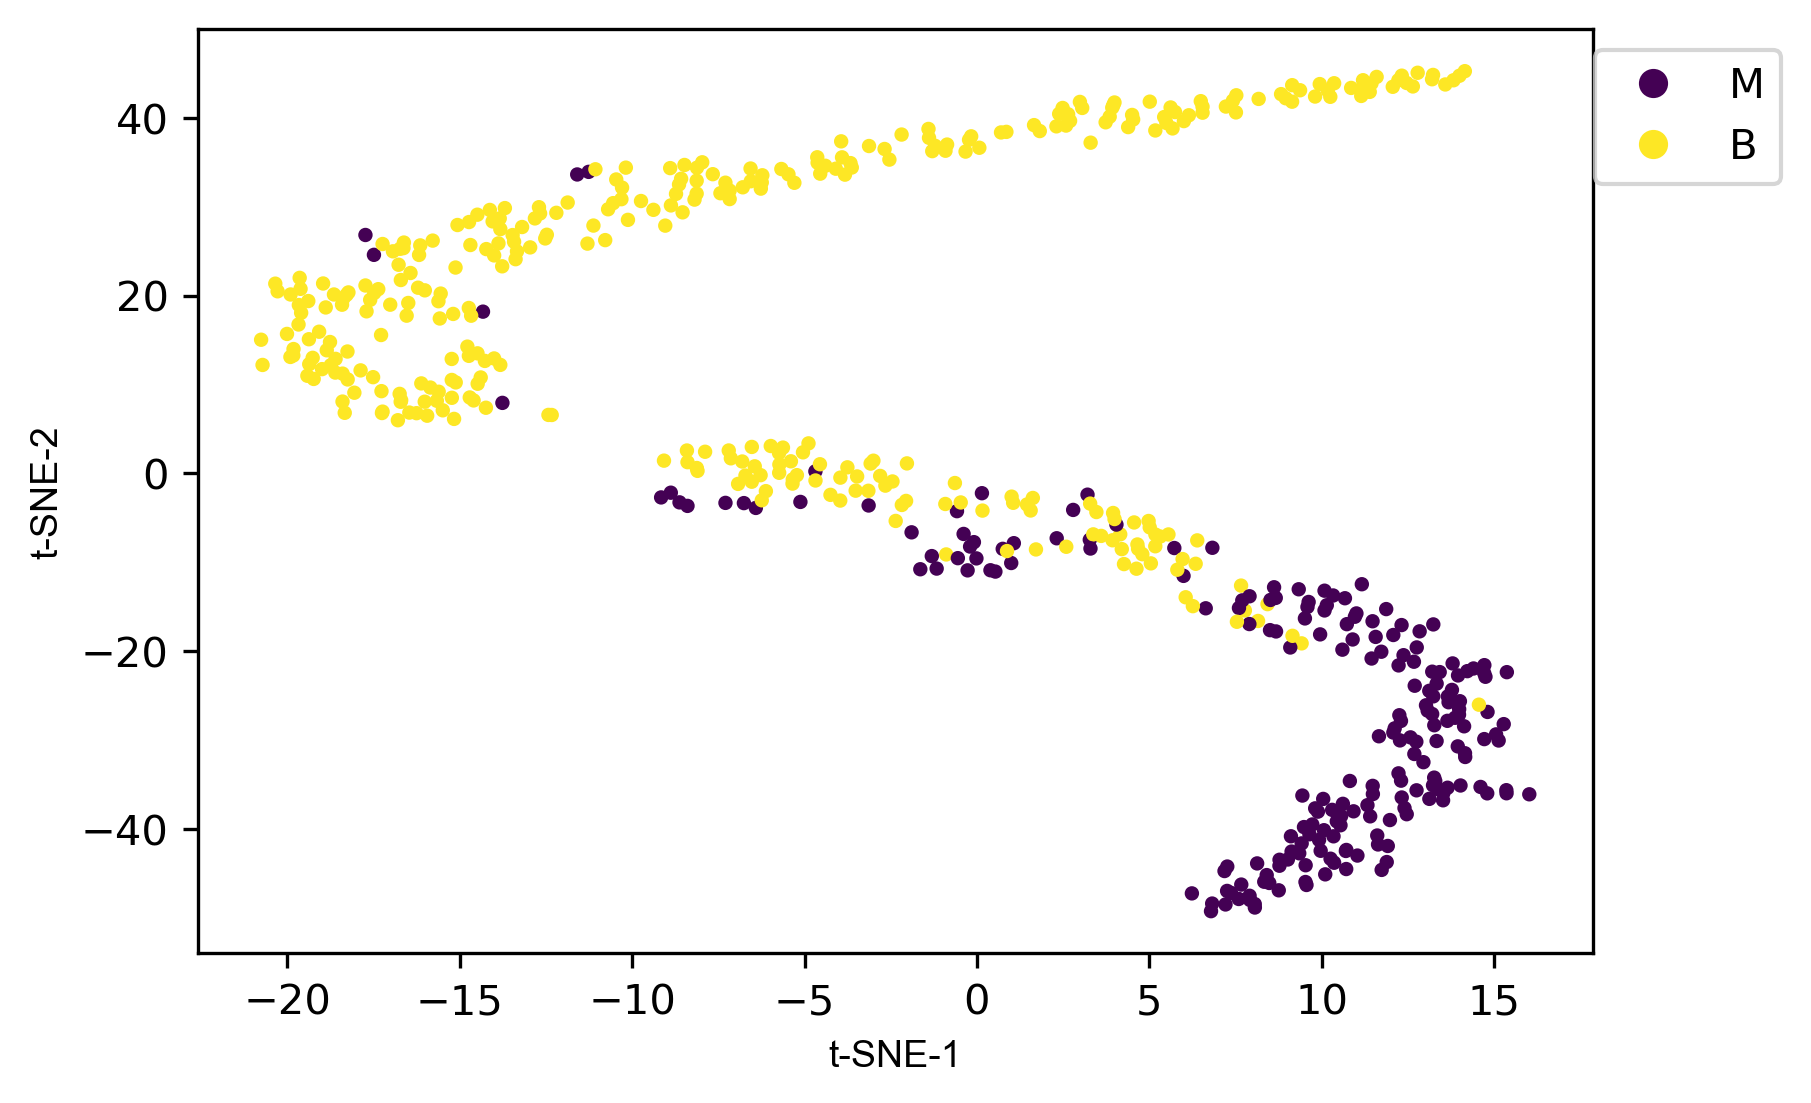

## t-SNE visualization using Seaborn's scatter plot()

In [36]:
# Plotting with seaborn

import matplotlib.pyplot as plt
import seaborn as sns

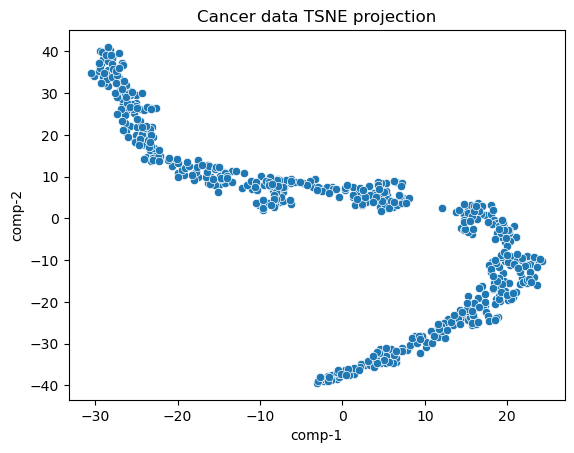

In [30]:
# TSNE visualization with seaborn

# creating data to plot
df = pd.DataFrame()
df['comp-1'] = tsne_data[:, 0]
df['comp-2'] = tsne_data[:, 1]

# creating a scatter plot
sns.scatterplot(x="comp-1", y="comp-2", data=df)

plt.title('Cancer data TSNE projection');

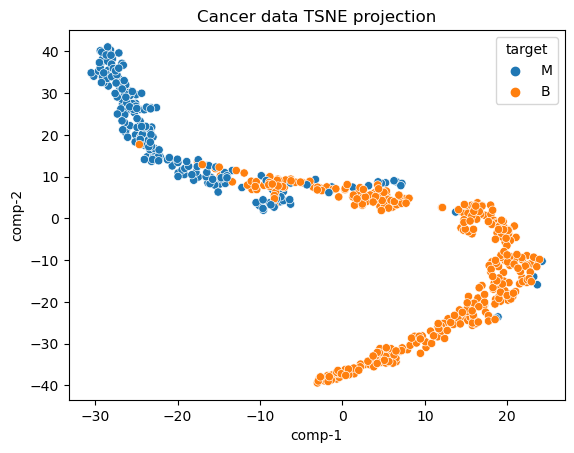

In [38]:
# passing target column 'diagnosis' as a hue parameter to differentiate the data points with different colours

# creating and adding a 'target' column to our data
df['target'] = dataframe['diagnosis']

# scatterplot with hue parameter
sns.scatterplot(x="comp-1", y="comp-2", data=df, hue=df['target'])

plt.title('Cancer data TSNE projection');

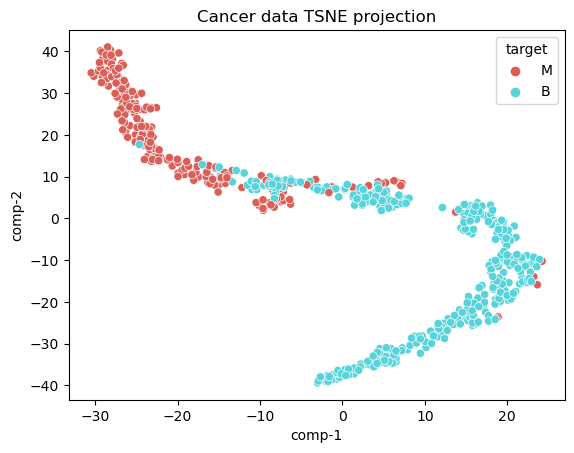

In [69]:
# using one of seaborn's colour palettes or colour codings or dispaly styles and saving the plot

sns.scatterplot(x="comp-1", y="comp-2",
                data=df,
                hue=df['target'],
               palette=sns.color_palette('hls', 2)) # 2 => no. of colours or no. of target categories

plt.title("Cancer data TSNE projection");

# saving the figure
plt.savefig("Cancer data TSNE Plot with Seaborn.png");

# plot will be saved to default directory

In [ ]:
# from the above plot we can conclude that there are two clusters or groups of data points
# this will help us undersatand the pattens in the data before building a machine learning (classification) model